In [2]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import math


In [3]:
import os  # import os module

directory = 'Data'  # set directory path

names =[]
for root, _, files in os.walk(directory):  
    for filename in files:  # loop through files in the current directory
        names.append(filename)

In [4]:
df = pd.DataFrame()
for i in names:
    x = pd.read_csv(f'Data/{i}')
    df = pd.concat([df,x])

In [5]:
sun = pd.read_csv("sun and temp.csv").drop("Unnamed: 0", axis = 1)

In [6]:
wind = pd.read_csv("wind.csv").drop("Unnamed: 0", axis = 1)

In [7]:
sun

,DATE,STATION,TMAX,TMIN,AWND,TSUN
0,2024-07-11,US1NJBG0003,NaN,NaN,NaN,NaN
1,2024-07-12,US1NJBG0003,NaN,NaN,NaN,NaN
2,2024-07-13,US1NJBG0003,NaN,NaN,NaN,NaN
3,2024-07-14,US1NJBG0003,NaN,NaN,NaN,NaN
4,2024-07-15,US1NJBG0003,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
743215,1980-06-26,USW00094789,80.0,63.0,NaN,NaN
743216,1980-06-27,USW00094789,95.0,66.0,NaN,NaN
743217,1980-06-28,USW00094789,76.0,66.0,NaN,NaN
743218,1980-06-29,USW00094789,78.0,66.0,NaN,NaN


In [8]:
wind

,DATE,STATION,WSF2,WSF5
0,2024-07-11,US1NJBG0003,NaN,NaN
1,2024-07-12,US1NJBG0003,NaN,NaN
2,2024-07-13,US1NJBG0003,NaN,NaN
3,2024-07-14,US1NJBG0003,NaN,NaN
4,2024-07-15,US1NJBG0003,NaN,NaN
...,...,...,...,...
743215,1980-06-26,USW00094789,NaN,NaN
743216,1980-06-27,USW00094789,NaN,NaN
743217,1980-06-28,USW00094789,NaN,NaN
743218,1980-06-29,USW00094789,NaN,NaN


In [9]:
df = df.merge(sun, on= ["DATE","STATION"], how = 'outer')

In [10]:
df = df.merge(wind, on= ["DATE","STATION"], how = 'outer')

In [11]:
df = df[df["DATE"] < "2025-01-01"].drop(["SNOW","LATITUDE","LONGITUDE"],axis=1)

In [12]:
df.head()

,STATION,NAME,ELEVATION,DATE,DAPR,MDPR,PRCP,TAVG,DASF,MDSF,TMAX,TMIN,AWND,TSUN,WSF2,WSF5
0,USC00066655,"PUTNAM LAKE, CT US",NaN,1980-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00280907,"BOONTON 1 SE, NJ US",NaN,1980-01-01,NaN,NaN,0.0,NaN,NaN,NaN,44.0,20.0,NaN,NaN,NaN,NaN
2,USC00281335,"CANOE BROOK, NJ US",NaN,1980-01-01,NaN,NaN,0.0,NaN,NaN,NaN,46.0,17.0,NaN,NaN,NaN,NaN
3,USC00282023,"CRANFORD, NJ US",NaN,1980-01-01,NaN,NaN,0.0,NaN,NaN,NaN,45.0,19.0,NaN,NaN,NaN,NaN
4,USC00282768,"ESSEX FELLS SERVICE BUILDING, NJ US",NaN,1980-01-01,NaN,NaN,0.0,NaN,NaN,NaN,46.0,17.0,NaN,NaN,NaN,NaN


In [13]:
df.shape

(743220, 16)

In [14]:
dfdata = df[["DATE","DAPR","MDPR","PRCP","TAVG","DASF","MDSF", "TMAX","TMIN","AWND","TSUN","WSF2","WSF5"]]

In [15]:
dfdata = dfdata.groupby("DATE").mean().reset_index()

In [16]:
dfdata.shape

(16437, 13)

In [17]:
dfdata.head()

,DATE,DAPR,MDPR,PRCP,TAVG,DASF,MDSF,TMAX,TMIN,AWND,TSUN,WSF2,WSF5
0,1980-01-01,NaN,NaN,0.000000,NaN,NaN,NaN,44.478261,24.52,NaN,NaN,NaN,NaN
1,1980-01-02,NaN,NaN,0.000000,NaN,NaN,NaN,42.480000,27.80,NaN,NaN,NaN,NaN
2,1980-01-03,NaN,NaN,0.000000,NaN,NaN,NaN,38.360000,25.68,NaN,NaN,NaN,NaN
3,1980-01-04,NaN,NaN,0.006129,NaN,NaN,NaN,31.240000,17.92,NaN,NaN,NaN,NaN
4,1980-01-05,NaN,NaN,0.103548,NaN,NaN,NaN,30.360000,21.44,NaN,NaN,NaN,NaN


DAPR = Number of days included in the multiday precipitation total (MDPR)

MDPR = Multiday precipitation total (inches)

PRCP = Precipitation (inches)

DASF = Number of days included in the multiday snowfall total (MDSF)

MDSF = Multiday snowfall total (inches)

TSUN = Daily total sunshine (minutes)

AWND = Average daily wind speed (miles per hour)

TMIN = Maximum temperature in Farenheit

TMAX = Minimum temperature in Farenheit

WSF2 = Fastest 2-minute wind speed (miles per hour)

WSF5 = Fastest 5-second wind speed (miles per hour)


Create New Columns

In [18]:
x = 0
count = []
for i in dfdata["PRCP"]:
    if i == 0.:
        x +=1
        count.append(x)
    else:
        x = 0
        count.append(x)
dfdata['count of dry days'] = count 

In [19]:
x = 0
count = []
for i in dfdata["PRCP"]:
    if i != 0. and i == i: # dont include nan values !
        x +=1
        count.append(x)
    else:
        x = 0
        count.append(x)
dfdata['count of wet days'] = count 

In [20]:
dfdata["TDIFF"] = dfdata["TMAX"] - dfdata["TMIN"]

In [21]:
dfdata["Month"] = pd.to_datetime(dfdata['DATE']).dt.month

In [22]:
dfdata["intense"] = np.where(dfdata["PRCP"] >= 1.0,1,0)

In [23]:
dfdata.shape

(16437, 18)

In [24]:
dfdata.isna().sum()

DATE                     0
DAPR                 13169
MDPR                 13103
PRCP                  1430
TAVG                  9799
DASF                 16424
MDSF                 16418
TMAX                     0
TMIN                     0
AWND                  1461
TSUN                 11281
WSF2                  5785
WSF5                  5785
count of dry days        0
count of wet days        0
TDIFF                    0
Month                    0
intense                  0
dtype: int64

In [25]:
# Drop NaNs
dfdata = dfdata.dropna(subset = ["PRCP"])

In [26]:
dfdata.isna().sum()

DATE                     0
DAPR                 11739
MDPR                 11673
PRCP                     0
TAVG                  8369
DASF                 14994
MDSF                 14988
TMAX                     0
TMIN                     0
AWND                  1461
TSUN                 10947
WSF2                  4689
WSF5                  4689
count of dry days        0
count of wet days        0
TDIFF                    0
Month                    0
intense                  0
dtype: int64

In [27]:
dfdata.shape

(15007, 18)

In [28]:
df_final = dfdata[["DATE","Month","PRCP","TMAX","TMIN","AWND","TDIFF","WSF2","WSF5","intense","count of dry days","count of wet days"]]
df_final = df_final.dropna().reset_index(drop = True)

In [29]:
df_final.shape

(10318, 12)

In [30]:
df_final.head()

,DATE,Month,PRCP,TMAX,TMIN,AWND,TDIFF,WSF2,WSF5,intense,count of dry days,count of wet days
0,1995-11-01,11,0.183214,57.083333,47.291667,6.9350,9.791667,13.0,17.9,0,0,6
1,1995-11-02,11,0.728929,64.782609,52.130435,7.4400,12.652174,14.1,17.9,0,0,7
2,1995-11-03,11,0.137500,70.250000,54.333333,7.8875,15.916667,15.0,19.9,0,0,8
3,1995-11-04,11,0.015357,60.250000,37.375000,14.6525,22.875000,21.9,30.0,0,0,9
4,1995-11-05,11,0.000714,48.458333,32.333333,10.2875,16.125000,15.0,19.9,0,0,10


In [31]:
df_final.to_csv("final.csv",index=False)

Plot Features

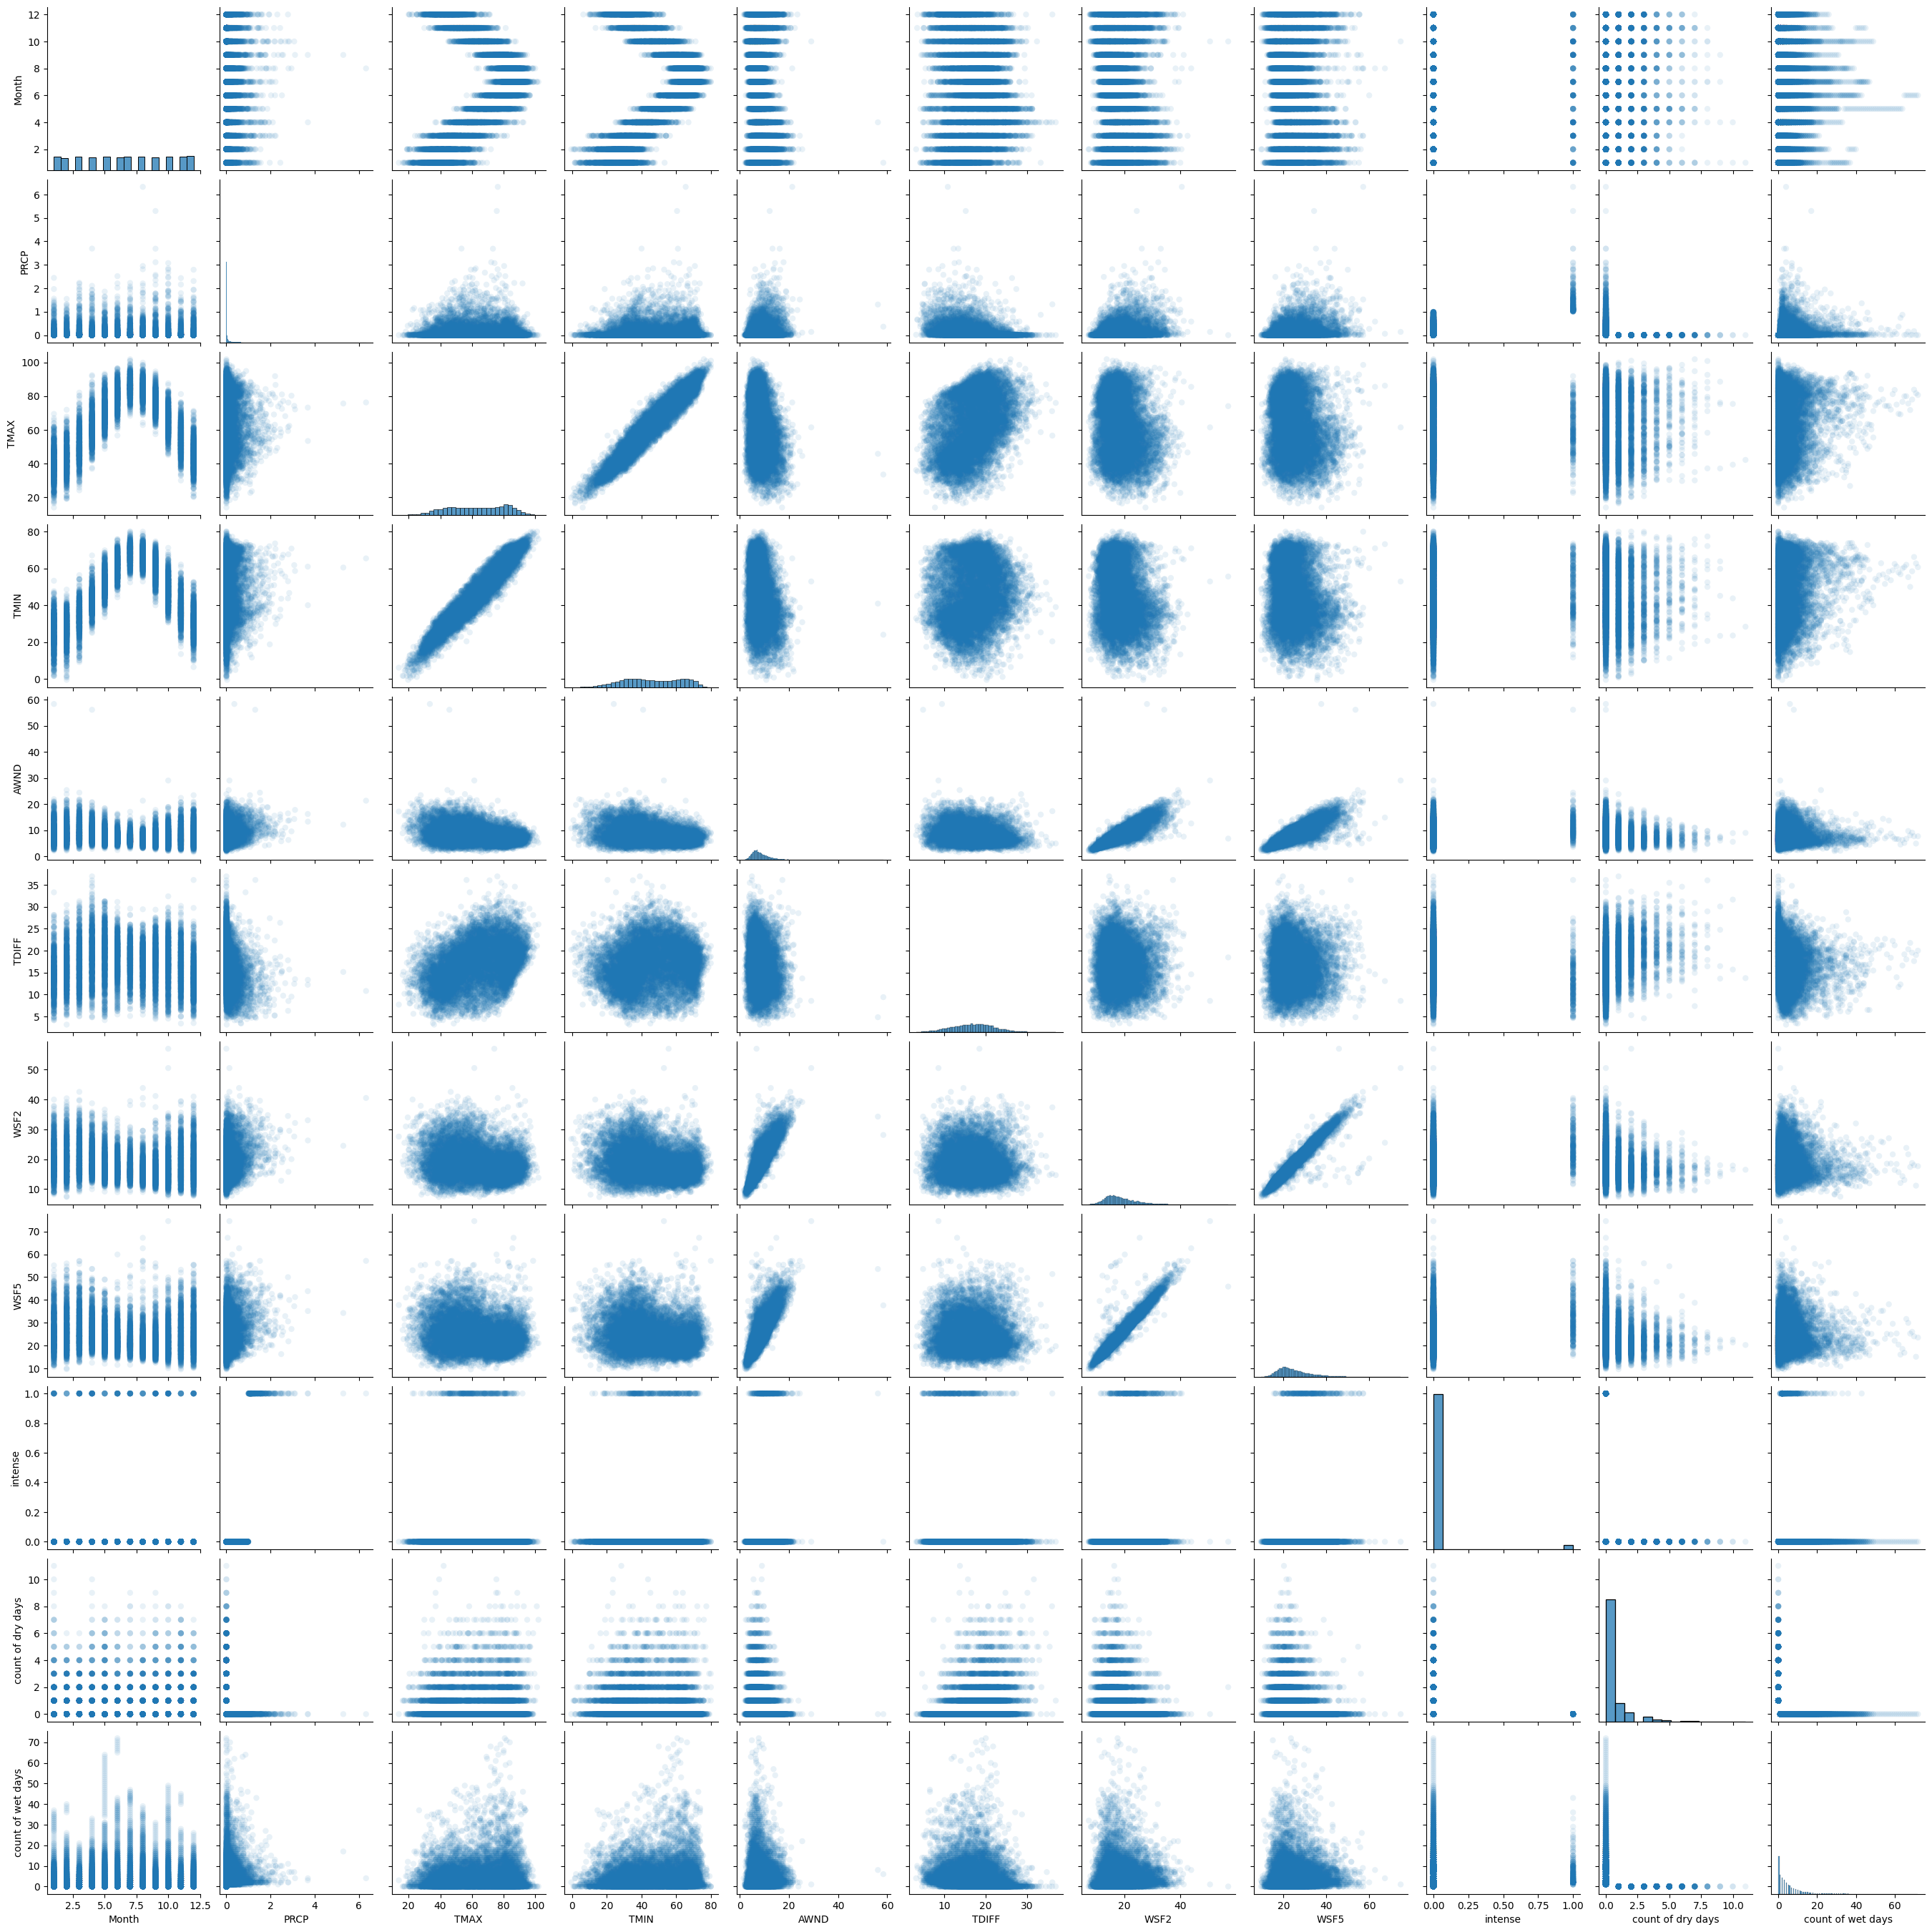

In [32]:
sns.pairplot(df_final, plot_kws=dict(alpha=.1, edgecolor='none'))

In [33]:
heatmap = df_final.loc[:,['Month', 'PRCP', 'TMAX', 'TMIN', 'AWND', 'TDIFF',
       'WSF2', 'WSF5', 'intense', 'count of dry days', 'count of wet days']]

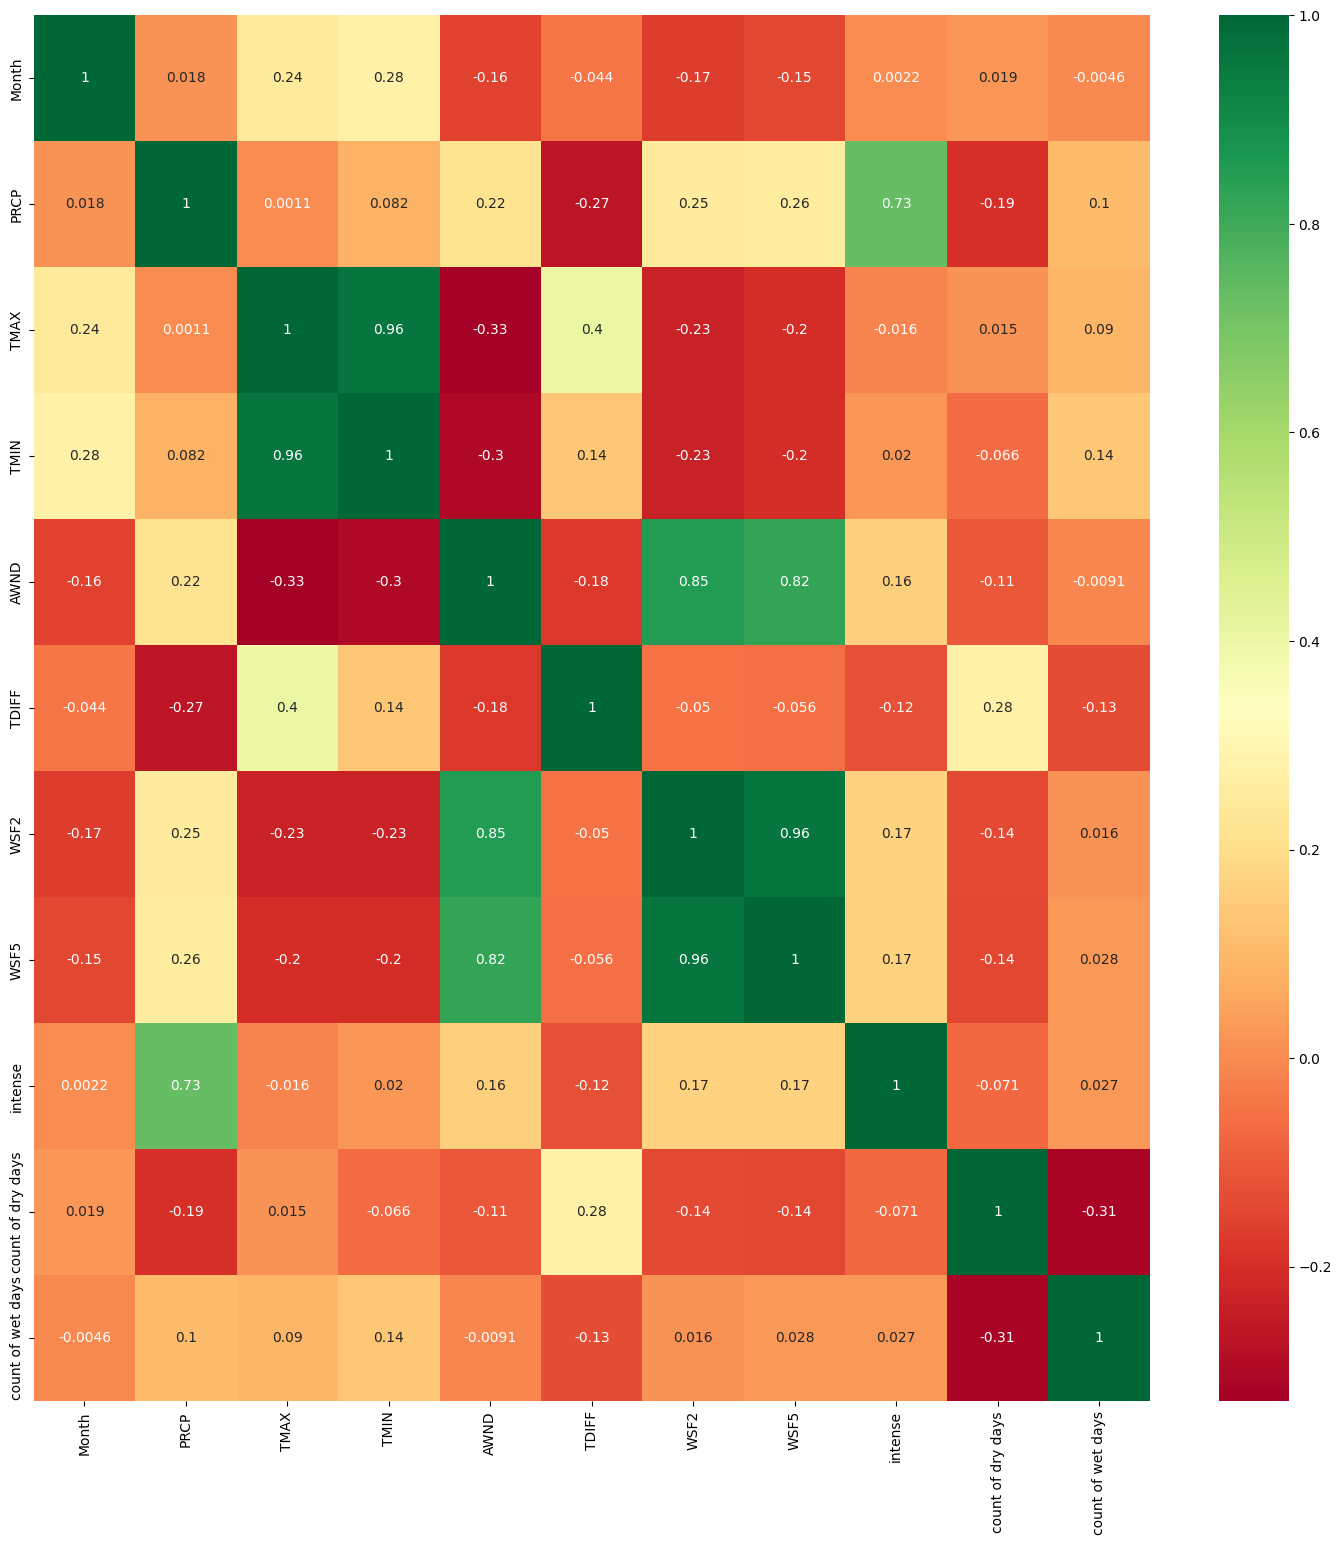

In [34]:
plt.figure(figsize=(18,18))
sns.heatmap(heatmap.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [35]:
features = heatmap.corr()['PRCP'].sort_values()
features

TDIFF               -0.268581
count of dry days   -0.194838
TMAX                 0.001144
Month                0.017607
TMIN                 0.082070
count of wet days    0.103282
AWND                 0.220373
WSF2                 0.250678
WSF5                 0.255502
intense              0.732103
PRCP                 1.000000
Name: PRCP, dtype: float64

<Axes: >

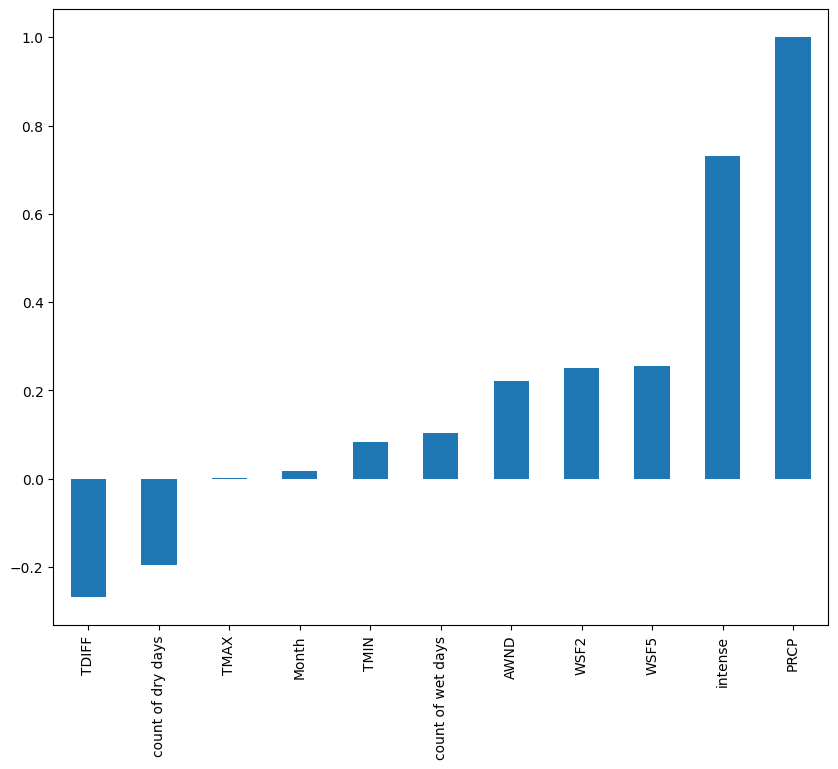

In [36]:
features.plot(kind='bar',figsize=(10,8))

Hypothesis Testing

1. Null: There is no significant change or difference in the rainfall pattern

    Alternative: There is a significant change or difference per month


2. Null: There is no significant change or difference in the rainfall pattern

    Alternative: There is a difference between rainfall patterns pre-2010 vs post-2010

3. Null:There is no significant change or difference in the rainfall intensity

    Alternative: There is a difference in intensity due to the number of dry days

Test the difference between rainfall patterns pre-2010 and post-2010

Square Root transform the data, since it is right skewed but has valid zero values.

In [40]:
pre = np.sqrt(dfdata.loc[dfdata["DATE"]< "2010-01-01"]["PRCP"])
post = np.sqrt(dfdata.loc[dfdata["DATE"]>="2010-01-01"]["PRCP"])

<Axes: xlabel='PRCP', ylabel='Density'>

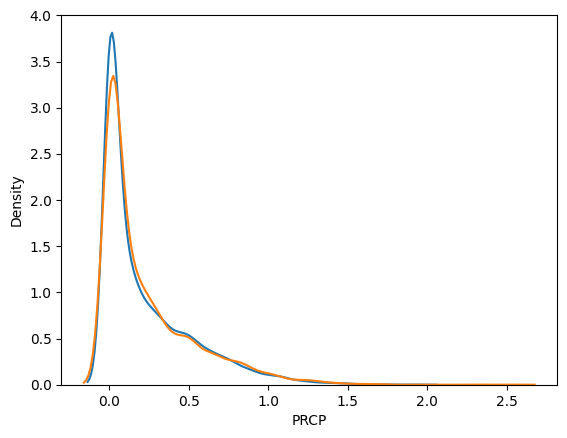

In [41]:
sns.kdeplot(pre)
sns.kdeplot(post)

In [42]:
pre.mean()

np.float64(0.22403944606640164)

In [43]:
post.mean()

np.float64(0.23197185374154622)

In [44]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(pre, post)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -1.5856369901579996 , p_value1 =  0.1128427525666953


In [45]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no significant change or difference in the rainfall amount.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is no significant change or difference in the rainfall amount.")

Conclusion: since p_value 0.1128427525666953 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is no significant change or difference in the rainfall amount.
